In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Seleccionamos los valores nulos
sentinels = {'PRECIP': ['Nulo'], 'EVAP': ['Nulo'], 'TMAX': ['Nulo'],'TMIN': ['Nulo']}

In [3]:
#Leemos el archivo descartando los valores nulos (sentinels)
datos_df = pd.read_csv("cajeme.txt",skiprows=0, sep='\s+',na_values=sentinels)

In [4]:
#Creamos un DataFrame con los valores del archivo
df = pd.DataFrame(datos_df)
df.head()

,FECHA,PRECIP,EVAP,TMAX,TMIN
0,01/01/1980,0.0,1.2,25.0,7.0
1,02/01/1980,0.0,1.7,22.0,8.0
2,03/01/1980,0.0,1.9,25.0,9.0
3,04/01/1980,0.0,1.8,26.0,6.0
4,05/01/1980,0.0,2.0,26.0,4.0


In [5]:
#Creamos una columna para la fecha como variable date
df['FECHAN'] = pd.to_datetime(df.apply(lambda x: x['FECHA'], 1), dayfirst=True)
df = df.drop(['FECHA'], 1)

In [28]:
#Creamos una columna para el número de mes y de año, respectivamente
df['MES'] = df['FECHAN'].dt.month
df['AÑO'] = df['FECHAN'].dt.year
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES,AÑO,TPROM,TDIF
0,0.0,1.2,25.0,7.0,1980-01-01,1,1980,16.0,18.0
1,0.0,1.7,22.0,8.0,1980-01-02,1,1980,15.0,14.0
2,0.0,1.9,25.0,9.0,1980-01-03,1,1980,17.0,16.0
3,0.0,1.8,26.0,6.0,1980-01-04,1,1980,16.0,20.0
4,0.0,2.0,26.0,4.0,1980-01-05,1,1980,15.0,22.0


In [7]:
#Contamos el número de valores disponibles por año.
df.groupby('AÑO').count()

,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES
AÑO,,,,,,
1980,366,366,366,366,366,366
1981,365,365,365,365,365,365
1982,365,365,365,365,365,365
1983,120,120,120,120,120,120
1984,275,275,275,275,275,275
1985,182,182,182,182,182,182
1986,242,242,242,242,242,242
1987,245,245,245,245,245,245
1988,305,305,300,301,305,305


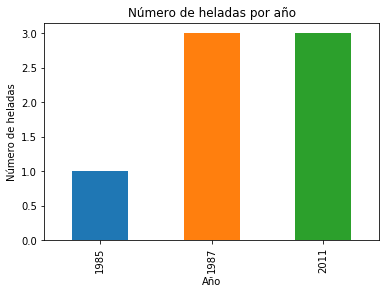

In [35]:
#Seleccionamos los días con heladas; es decir temperaturas mínimas menores a 0C, y contamos el número de ocurrencia para
#cada año.
TempHel = pd.DataFrame(df.loc[df['TMIN']<0])            #Elegimos los valores que cumplan con la condición inicial.
TempHel = pd.DataFrame(TempHel.groupby('AÑO').count())  #Creamos un Dataframe con los valores que cumplan lo anterior,
                                                        #agrupándolos y contándolos por año.

#Creamos un Dataframe que indique el número de valores
nTempHel_df = TempHel.filter(['TMIN'],axis=1)           #Filtramos la columna que contenga los valores de la condición.
nTempHel_df['NUMHEL'] = nTempHel_df['TMIN']             #Creamos una nueva columna que indique el número de veces que se
                                                        #cumple dicha condición.
nTempHel_df = nTempHel_df.drop(['TMIN'],1)              #Eliminamos la columna que contenga los valores de la condición.

nTempHel_df = nTempHel_df.reset_index()                 #Reiniciamos el index (separamos el año del índice)

#Graficamos
nTempHel_df.plot.bar(x='AÑO',y='NUMHEL',legend=None)    #Tomamos nuestro eje x como los años y el eje y como el número de
                                                        #veces que se cumplió la condición en un año.
plt.title("Número de heladas por año")                  #Título de la gráfica.
plt.ylabel("Número de heladas")                         #Nombre del eje x.
plt.xlabel("Año")                                       #Nombre del eje y.
plt.savefig('grafica1')                                 #Guardamos la gráfica como imágen.

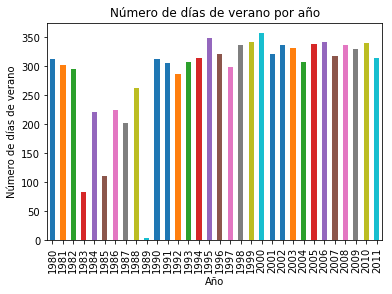

In [37]:
#Seleccionamos los días con temperaturas de verano; es decir, temperaturas máximas mayores a 25C, y contamos el número de
#ocurrencia para cada año.
TempVer = pd.DataFrame(df.loc[df['TMAX']>25])
TempVer = pd.DataFrame(TempVer.groupby('AÑO').count())

#Creamos un Dataframe que indique el número de valores
nTempVer_df = TempVer.filter(['TMAX'],axis=1)
nTempVer_df['NUMVER'] = nTempVer_df['TMAX']
nTempVer_df = nTempVer_df.drop(['TMAX'],1)

nTempVer_df = nTempVer_df.reset_index()

#Graficamos
nTempVer_df.plot.bar(x='AÑO',y='NUMVER',legend=None)
plt.title("Número de días de verano por año")
plt.ylabel("Número de días de verano")
plt.xlabel("Año")
plt.savefig('grafica2')

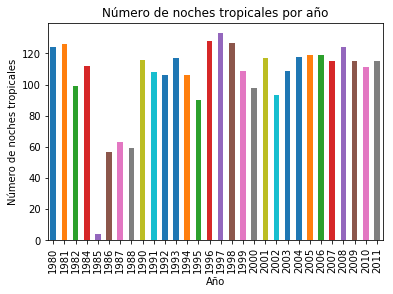

In [38]:
#Seleccionamos los días con noches tropicales; es decir, temperaturas míximas mayores a 20C, y contamos el número de
#ocurrencia para cada año.
TempTrop = pd.DataFrame(df.loc[df['TMIN']>20])
TempTrop = pd.DataFrame(TempTrop.groupby('AÑO').count())

#Creamos un Dataframe que indique el número de valores
nTempTrop_df = TempTrop.filter(['TMIN'],axis=1)
nTempTrop_df['NUMTROP'] = nTempTrop_df['TMIN']
nTempTrop_df = nTempTrop_df.drop(['TMIN'],1)

nTempTrop_df = nTempTrop_df.reset_index()

#Graficamos
nTempTrop_df.plot.bar(x='AÑO',y='NUMTROP',legend=None)
plt.title("Número de noches tropicales por año")
plt.ylabel("Número de noches tropicales")
plt.xlabel("Año")
plt.savefig('grafica3')

In [39]:
#Creamos una nueva columna que contenga la temperatura promedio para cada día
df['TPROM'] = (df.TMAX + df.TMIN)/2  #Temperatura promedio.

In [43]:
#Realizamos un contador que cuente los dìas donde la temperatura promedio es mayor a 5C, así como los primeros seis días
#consecutivos en donde se cumple lo anterior. Llamamos a estos días como "primeros días" ya que son los primeros días
#de la Estación de Cultivo.
primdias = []
primseis=-1

for j in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for i in range(5,len(df)-1):
        if(df["AÑO"][i-5] == j):
            if(df["TPROM"][i-5] > 5 and df["TPROM"][i-4] > 5 and df["TPROM"][i-3] > 5 and
               df["TPROM"][i-2] > 5 and df["TPROM"][i-1] > 5 and df["TPROM"][i]   > 5):
                    primseis = i
                    break
    if(primseis != -1):
        primdias.append(primseis)
        primseis= -1
    else:
        primdias.append("NA")

In [13]:
#Realizamos ahora un contador que cuente los dìas donde la temperatura promedio es menor a 5C, así como los primeros seis días
#consecutivos en donde se cumple lo anterior. Llamamos a estos días como los "últimos días" ya que son los últimos días 
#de la Temporada de Cultivo.
ultdias = []
ultseis = -1

for j in range(df["AÑO"][len(df)-1],df["AÑO"][0]-1,-1):
    for i in range(len(df)-1,5,-1):
        if(df["AÑO"][i] == j):
            if(df["TPROM"][i-5] < 5 and df["TPROM"][i-4] < 5 and df["TPROM"][i-3] < 5 and
               df["TPROM"][i-2] < 5 and df["TPROM"][i-1] < 5 and df["TPROM"][i]   < 5):
                    ultseis = i-5
                    break
    if(ultseis != -1):
        ultdias.append(ultseis)
        ultseis= -1
    else:
        ultdias.append("NA")

In [14]:
#Con los valores que obtuvimos con los pasos anteriores, calculamos la Temporada de Cultivo (Growing Season Large)
#de nuestra región. Este intervalo se interpreta como desde los primeros seis días seguidos donde la temperatura 
#fue mayor a 5C hasta los últimos seis días donde la temperatura fue menor a 5C, calculando esto como una diferencia 
#de número de días entre ambos arreglos.
GSL = []
inicial = df['AÑO'][0]
for i in range(0,len(ultdias)):
    if(ultdias[i]!="NA" and primdias[i]!="NA"):
        GSL.append(ultdias[i]-primdias[i])
    if(ultdias[i]=='NA'):
            GSL.append( len(df[df['AÑO'] == inicial].index) )
    else:
        if(primdias[i]=='NA'):
            GSL.append(0)
    inicial=inicial+1

In [15]:
#Mostramos los días de Temporada de Cultivo (GSL)
GSL

[366,
 365,
 365,
 120,
 275,
 182,
 242,
 245,
 305,
 31,
 365,
 365,
 366,
 365,
 365,
 365,
 366,
 365,
 365,
 365,
 366,
 365,
 365,
 365,
 366,
 365,
 365,
 365,
 366,
 365,
 365,
 365]

In [47]:
#Buscamos la temperatura máxima mensual de la Temperatura Máxima (TXx)
TXx=[]                       #Arreglo que almacena los valores que cummplen la condición.
inicial=df['AÑO'][0]         #Contador de año que permite proseguir el loop.
nAños=df['AÑO'].nunique()    #Contador del número de valores disponibles para cada año.


for i in range(0,nAños):     #Declaramos el rango de valores por los cuales se repetirá el ciclo.
        df_año = df[df['AÑO']==inicial]  #Declaramos un arreglo que cuente cada año que pasa.
        for j in range (1,13):           #Declaramos el rango de valores por los cuales se repetirá el subciclo.
                df_mes = df_año[df_año['MES']==j]   #Declaramos un arreglo que cuente cada mes de cada año que pasa.
                TMAXMES = df_mes.TMAX.max()         #Obtenemos el valor deseado de cada mes de cada año.
                TXx.append(TMAXMES)                 #Almacenamos el valor deseado en nuestro arreglo de valores que 
                                                    #cumplen la condición.
        inicial=inicial+1    #Actualizamos el contador de  año para seguir el loop.

In [17]:
#Buscamos la temperatura máxima mensual de la Temperatura Mínima (TNX)
TNx=[]
inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()


for i in range(0,nAños):
        df_año = df[df['AÑO']==inicial]
        for j in range (1,13):
                df_mes = df_año[df_año['MES']==j]
                TMAXMES = df_mes.TMIN.max()
                TNx.append(TMAXMES)
        inicial=inicial+1

In [18]:
#Buscamos la temperatura mínima mensual de la Temperatura Máxima (TXn)
TXn=[]
inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()


for i in range(0,nAños):
        df_año = df[df['AÑO']==inicial]
        for j in range (1,13):
                df_mes = df_año[df_año['MES']==j]
                TMINMES = df_mes.TMAX.min()
                TXn.append(TMINMES)
        inicial=inicial+1

In [19]:
#Buscamos la temperatura mínima mensual de la Temperatura Mínima (TNn)
TNn=[]
inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()


for i in range(0,nAños):
        df_año = df[df['AÑO']==inicial]
        for j in range (1,13):
                df_mes = df_año[df_año['MES']==j]
                TMINMES = df_mes.TMIN.min()
                TNn.append(TMINMES)
        inicial=inicial+1

In [20]:
#Calculamos la diferencia de temperaturas y colocamos los valores en una columna de nuestro
#dataframe
df['TDIF'] = (df.TMAX - df.TMIN)

#Para el promedio mensual de diferencia de temperaturas, realizamos un arreglo que calcule el promedio de cada mes:
DTR=[]
inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()


for i in range(0,nAños):
        df_año = df[df['AÑO']==inicial]
        for j in range (1,13):
                df_mes = df_año[df_año['MES']==j]
                TDIFPROM = df_mes.TDIF.mean()
                DTR.append(TDIFPROM)
    
        inicial=inicial+1

In [21]:
#Calculamos la precipitación diaria máxima mensual en 1 día (Rx1day)
Rx1 = []
inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()

for i in range(0,nAños):
    df_año = df[df['AÑO']==inicial]
    for j in range(1,13):
        df_mes = df_año[df_año['MES']==j]
        if(df_mes['PRECIP'].mean()!=0 and df_mes['PRECIP'].count()!=0):
            valmaxid = df_mes['PRECIP'].idxmax()
            valmax = df_mes['PRECIP'][valmaxid]
            Rx1.append(valmax)
        else:  
            Rx1.append(0.0)
            
    inicial=inicial+1

In [22]:
#Calculamos la precipitación diaria máxima mensual en 5 días (Rx5) 
Rx5 = []
mx = -10000

inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()

for i in range(0,nAños):
    df_año = df[df['AÑO']==inicial]
    for j in range(1,13):
        df_mes = df_año[df_año['MES']==j]
        df_mes = df_mes.reset_index()
        if(df_mes.PRECIP.count()!=0 and df_mes.PRECIP.mean()!=0):
            for k in range(4,len(df_mes)):
                suma = (df_mes["PRECIP"][k-4]+df_mes["PRECIP"][k-3]+
                         df_mes["PRECIP"][k-2]+df_mes["PRECIP"][k-1]+
                         df_mes["PRECIP"][k])
               
                if(suma>mx):
                    mx=suma
            
            Rx5.append(mx)
            mx=-10000
        else:
            Rx5.append(0.0)
        
    inicial=inicial+1

In [23]:
#Buscamos el número de días en un año con precipitación mayor igual a 1mm (SDII)

#FIltramos los valores de precipitación mayores a 1mm y los agrupamos por año
SDII = df[df['PRECIP']>1]
SDII = pd.DataFrame(SDII.groupby('AÑO').count())

#Creamos un nuevo dataframe con un nuevo índice
SDII_df = SDII.filter(['PRECIP'],axis=1)
SDII_df['NUM PRECIP'] = SDII_df['PRECIP']
SDII_df = SDII_df.drop(['PRECIP'],1)
SDII_df= SDII_df.reset_index()
SDII_df

,AÑO,NUM PRECIP
0,1980,20
1,1981,20
2,1982,24
3,1983,8
4,1984,35
5,1985,11
6,1986,13
7,1987,9
8,1988,6
9,1989,3


In [24]:
#Buscamos el número de días en el año con precipitación diaria mayor igual a 10 mm

#Filtramos los valores de precipitaciones mayores a 10mm y los agrupamos por año
R10mm = df[df['PRECIP']>10]
R10mm = pd.DataFrame(R10mm.groupby('AÑO').count())

#Creamos un dataframe con un nuevo índice
R10mm_df = R10mm.filter(['PRECIP'],axis=1)
R10mm_df['NUM PRECIP10'] = R10mm_df['PRECIP']
R10mm_df = R10mm_df.drop(['PRECIP'],1)
R10mm_df= R10mm_df.reset_index()
R10mm_df

,AÑO,NUM PRECIP10
0,1980,5
1,1981,14
2,1982,7
3,1983,4
4,1984,12
5,1985,4
6,1986,5
7,1987,4
8,1988,3
9,1990,12


In [25]:
#Buscamos el número de días en el año con precipitación diaria mayor igual a 20mm.

#Fitramos los valores de precipitación mayores a 20mm y los agrupamos por año
R20mm = df[df['PRECIP']>20]
R20mm = pd.DataFrame(R20mm.groupby('AÑO').count())

#Creamos un nuevo DataFrame con un nuevo índice
R20mm_df = R20mm.filter(['PRECIP'],axis=1)
R20mm_df['NUM PRECIP20'] = R20mm_df['PRECIP']
R20mm_df = R20mm_df.drop(['PRECIP'],1)
R20mm_df= R20mm_df.reset_index()
R20mm_df

,AÑO,NUM PRECIP20
0,1980,2
1,1981,7
2,1982,2
3,1984,8
4,1985,1
5,1986,4
6,1987,3
7,1988,2
8,1990,7
9,1991,4


In [26]:
#Buscamos el número de días consecutivos secos, sin precipitación o precipitación < 1mm.
CDD_año = []
CDD = []
dias = 0

inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()

for i in range(0,nAños):
    df_año = df[df['AÑO']==inicial]
    df_año = df_año.reset_index()
    for k in range(0,len(df_año)):
        if(df_año['PRECIP'][k]<1):
            dias = dias +1
        else:
            CDD_año.append(dias)
            dias=0
    CDD_max=max(CDD_año)
    CDD_año = []
    CDD.append(CDD_max)
    inicial=inicial+1

In [27]:
#Buscamos el número de días consecutivos húmedos, con precipitación igual o mayor a 1mm. 
CWD_año = []
CWD = []
dias = 0

inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()

for i in range(0,nAños):
    daño = df[df['AÑO']==inicial]
    daño = daño.reset_index()
    for k in range(0,len(daño)):
        if(daño['PRECIP'][k]>=1):
            dias = dias +1
        else:
            CWD_año.append(dias)
            dias=0
    CWD_max=max(CWD_año)
    CWD_año = []
    CWD.append(CWD_max)
    inicial=inicial+1